In [21]:
# Not needed in Saturn but useful for local run
# import sys
# !{sys.executable} -m pip install numpy pandas matplotlib sklearn

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

---

Here, X is the set of independent variables and y is the set of labels

In [1]:
dataset = pd.read_csv(r'data/reddit-train.csv')
label_heading = 'label'
X = dataset.iloc[:, 7:]
subreddits = np.array(dataset.iloc[:, 0])
X["subreddits"] = subreddits
y = dataset.iloc[:, dataset.columns == label_heading].values

NameError: name 'pd' is not defined

## Taking care of missing data
---
For now, replacing NaNs with the mean value for that column. Meanwhile let's think about better ways to deal with this.

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Numeric data starts from column 5
imputer.fit(X[:, 5:])
X[:, 5:] = imputer.transform(X[:, 5:])

In [3]:
print('Dataset Dimensions')
print('X: ', X.shape)
print('y: ', y.shape)

Dataset Dimensions
X:  (2838, 109)
y:  (2838, 1)


In [4]:
dataset.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [7]:
dataset.describe()dataset.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [8]:
dataset.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

## Removing Outliers

In [9]:
 from scipy import stats
 dataset.iloc[:, 5:][(np.abs(stats.zscore(dataset.iloc[:, 5:])) < 6).all(axis=1)]

,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,1,0.800000,1521614353,5,1.806818,116,72.64,15.04,89.26,1.00,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,0,1.000000,1527009817,4,9.429737,109,79.08,76.85,56.75,98.18,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,1,0.800000,1535935605,2,7.769821,167,33.80,76.38,86.24,25.77,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,1,0.600000,1516429555,0,2.667798,273,2.98,15.25,95.42,79.26,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,1,0.800000,1539809005,24,7.554238,89,32.22,28.71,84.01,1.00,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0,1.000000,1515187044,13,-1.369333,89,19.41,99.00,37.57,99.00,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,1,1.000000,1539827412,33,9.425478,135,40.97,4.45,98.01,1.00,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,0,1.000000,1539269312,2,11.060675,134,79.52,97.34,2.27,80.01,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,0,0.571429,1488938143,4,2.421912,68,29.74,61.58,21.06,25.77,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [10]:
dataset['subreddit']dataset['subreddit']

0                   ptsd
1             assistance
2                   ptsd
3          relationships
4       survivorsofabuse
              ...       
2833       relationships
2834                ptsd
2835             anxiety
2836      almosthomeless
2837                ptsd
Name: subreddit, Length: 2838, dtype: object

In [11]:
print(X)print(X)

[['ptsd' '8601tu' '(15, 20)' ... 1.0 3.253572568 -0.002741703]
 ['assistance' '8lbrx9' '(0, 5)' ... 2.0 8.828315789 0.292857143]
 ['ptsd' '9ch1zh' '(15, 20)' ... 0.0 7.841666667 0.011893939]
 ...
 ['anxiety' '9nam6l' '(5, 10)' ... 1.0 9.951523723 0.045454545]
 ['almosthomeless' '5y53ya' '[5, 10]' ... 7.0 4.036764706 0.159722222]
 ['ptsd' '5y25cl' '[0, 5]' ... 2.0 2.412 0.016666667]]


## Encoding categorical data (subreddit names)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [33]:
print(X)print(X)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   3.25357257e+00 -2.74170300e-03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  2.00000000e+00
   8.82831579e+00  2.92857143e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   7.84166667e+00  1.18939390e-02]
 ...
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   9.95152372e+00  4.54545450e-02]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  7.00000000e+00
   4.03676471e+00  1.59722222e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.00000000e+00
   2.41200000e+00  1.66666670e-02]]


## Visualizing the Dataset

In [14]:
counts = dataset['subreddit'].value_counts().rename_axis('unique_values').reset_index(name='counts')
print(counts)

      unique_values  counts
0              ptsd     584
1     relationships     552
2           anxiety     503
3  domesticviolence     316
4        assistance     289
5  survivorsofabuse     245
6          homeless     168
7    almosthomeless      80
8            stress      64
9       food_pantry      37


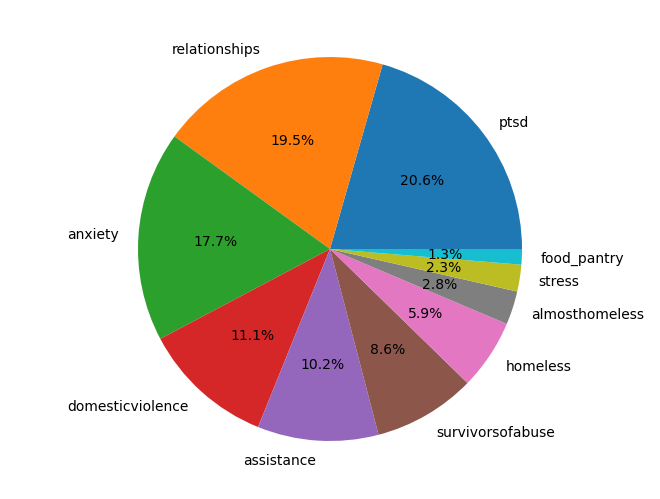

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
# print(counts.values[:, 0])
subreddits = counts.values[:, 0]
values = counts.values[:, 1]
ax.pie(values, labels = subreddits, autopct='%1.1f%%')
plt.show()

In [ ]:
dataset['sentiment'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')